In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

In [2]:
price_new = pd.read_csv('Ames_Price_Preprocessed.csv')
price_new = price_new.loc[:, ~price_new.columns.isin(['Unnamed: 0'])]

In [3]:
X = price_new.loc[:, ~price_new.columns.isin(['SalePrice'])]
y = price_new['SalePrice']

In [4]:
X.head()

,GrLivArea,LotFrontage,LotArea,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,CentralAir__N,Electrical__FuseA,Electrical__FuseF,Electrical__FuseP,GarageType__2Types,GarageType__Basment,GarageType__BuiltIn,GarageType__CarPort,GarageType__Detchd,GarageType__No Garage
0,856,NaN,7890,3,3,0,0,5,5,1939,...,0,0,0,0,0,0,0,0,1,0
1,1049,42.0,4235,3,3,0,0,4,4,1984,...,0,0,0,0,0,0,0,0,0,0
2,1001,60.0,6060,3,3,0,0,4,8,1930,...,0,0,0,0,0,0,0,0,1,0
3,1039,80.0,8146,3,3,0,0,3,7,1900,...,0,0,0,0,0,0,0,0,1,0
4,1665,70.0,8400,3,3,0,0,7,5,2001,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y.head()

0    126000
1    139500
2    124900
3    114000
4    227000
Name: SalePrice, dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
min_max = MinMaxScaler()

scaled = scaler.fit_transform(X)
X[:] = scaled

/var/folders/y5/b9fw24n10vgc4qtr2t4cyl3h0000gn/T/ipykernel_9678/3177573486.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[:] = scaled


In [7]:
scaled

array([[-1.29459522,         nan, -0.27339123, ..., -0.05935069,
         1.60655084, -0.22733611],
       [-0.89698558, -1.16041361, -0.72314307, ..., -0.05935069,
        -0.62245151, -0.22733611],
       [-0.99587295, -0.37173495, -0.49857477, ..., -0.05935069,
         1.60655084, -0.22733611],
       ...,
       [ 1.06634081,  0.59220564, -0.47273404, ..., -0.05935069,
        -0.62245151, -0.22733611],
       [ 0.73671623,         nan, -0.15821538, ..., -0.05935069,
        -0.62245151, -0.22733611],
       [ 0.87886683,  0.50457467, -0.06863416, ..., -0.05935069,
        -0.62245151, -0.22733611]])

In [8]:
X.head()

,GrLivArea,LotFrontage,LotArea,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,CentralAir__N,Electrical__FuseA,Electrical__FuseF,Electrical__FuseP,GarageType__2Types,GarageType__Basment,GarageType__BuiltIn,GarageType__CarPort,GarageType__Detchd,GarageType__No Garage
0,-1.294595,NaN,-0.273391,0.70402,0.295973,0.02794,-0.214915,-0.028552,0.336155,-1.047751,...,-0.260554,-0.264796,-0.12428,-0.052322,-0.090873,-0.103162,-0.247504,-0.059351,1.606551,-0.227336
1,-0.896986,-1.160414,-0.723143,0.70402,0.295973,0.02794,-0.214915,-0.760633,-0.553320,0.468124,...,-0.260554,-0.264796,-0.12428,-0.052322,-0.090873,-0.103162,-0.247504,-0.059351,-0.622452,-0.227336
2,-0.995873,-0.371735,-0.498575,0.70402,0.295973,0.02794,-0.214915,-0.760633,3.004578,-1.350926,...,-0.260554,-0.264796,-0.12428,-0.052322,-0.090873,-0.103162,-0.247504,-0.059351,1.606551,-0.227336
3,-0.917587,0.504575,-0.241890,0.70402,0.295973,0.02794,-0.214915,-1.492713,2.115104,-2.361510,...,-0.260554,-0.264796,-0.12428,-0.052322,-0.090873,-0.103162,-0.247504,-0.059351,1.606551,-0.227336
4,0.372069,0.066420,-0.210635,0.70402,0.295973,0.02794,-0.214915,1.435609,0.336155,1.040788,...,-0.260554,-0.264796,-0.12428,-0.052322,-0.090873,-0.103162,-0.247504,-0.059351,-0.622452,-0.227336


In [9]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(missing_values = np.nan, n_neighbors = 5, weights = 'uniform', metric = 'nan_euclidean')
imputer.fit(X)
X[:] = imputer.transform(X)

/var/folders/y5/b9fw24n10vgc4qtr2t4cyl3h0000gn/T/ipykernel_9678/1236197353.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[:] = imputer.transform(X)
/var/folders/y5/b9fw24n10vgc4qtr2t4cyl3h0000gn/T/ipykernel_9678/1236197353.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[:] = imputer.transform(X)


In [10]:
X.head()

,GrLivArea,LotFrontage,LotArea,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,CentralAir__N,Electrical__FuseA,Electrical__FuseF,Electrical__FuseP,GarageType__2Types,GarageType__Basment,GarageType__BuiltIn,GarageType__CarPort,GarageType__Detchd,GarageType__No Garage
0,-1.294595,-0.468129,-0.273391,0.70402,0.295973,0.02794,-0.214915,-0.028552,0.336155,-1.047751,...,-0.260554,-0.264796,-0.12428,-0.052322,-0.090873,-0.103162,-0.247504,-0.059351,1.606551,-0.227336
1,-0.896986,-1.160414,-0.723143,0.70402,0.295973,0.02794,-0.214915,-0.760633,-0.553320,0.468124,...,-0.260554,-0.264796,-0.12428,-0.052322,-0.090873,-0.103162,-0.247504,-0.059351,-0.622452,-0.227336
2,-0.995873,-0.371735,-0.498575,0.70402,0.295973,0.02794,-0.214915,-0.760633,3.004578,-1.350926,...,-0.260554,-0.264796,-0.12428,-0.052322,-0.090873,-0.103162,-0.247504,-0.059351,1.606551,-0.227336
3,-0.917587,0.504575,-0.241890,0.70402,0.295973,0.02794,-0.214915,-1.492713,2.115104,-2.361510,...,-0.260554,-0.264796,-0.12428,-0.052322,-0.090873,-0.103162,-0.247504,-0.059351,1.606551,-0.227336
4,0.372069,0.066420,-0.210635,0.70402,0.295973,0.02794,-0.214915,1.435609,0.336155,1.040788,...,-0.260554,-0.264796,-0.12428,-0.052322,-0.090873,-0.103162,-0.247504,-0.059351,-0.622452,-0.227336


In [11]:
null_X = X.isnull().sum().to_frame()
null_X.T

,GrLivArea,LotFrontage,LotArea,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,CentralAir__N,Electrical__FuseA,Electrical__FuseF,Electrical__FuseP,GarageType__2Types,GarageType__Basment,GarageType__BuiltIn,GarageType__CarPort,GarageType__Detchd,GarageType__No Garage
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['feature'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif.T

/Users/stevenmlee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,190
feature,GrLivArea,LotFrontage,LotArea,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,CentralAir__N,Electrical__FuseA,Electrical__FuseF,Electrical__FuseP,GarageType__2Types,GarageType__Basment,GarageType__BuiltIn,GarageType__CarPort,GarageType__Detchd,GarageType__No Garage
VIF,inf,2.810728,1.870142,1.581649,1.935522,1.498843,2.066792,4.673363,2.295164,15.474204,...,2.050293,1.333114,1.351023,1.219741,1.233646,1.38538,1.627244,1.186838,2.626133,13.587539


In [13]:
import math

multico = []
no_multico = []

for i in range(len(vif)):
  if math.isinf(vif['VIF'].iloc[i]) or vif['VIF'].iloc[i] > 5:
    multico.append(vif['feature'].iloc[i])
  else:
    no_multico.append(vif['feature'].iloc[i])

In [14]:
print(multico)

['GrLivArea', 'YearBuilt', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'MSSubClass__45', 'MSSubClass__50', 'MSSubClass__60', 'MSSubClass__70', 'MSSubClass__80', 'MSSubClass__90', 'MSSubClass__120', 'MSSubClass__160', 'MSSubClass__180', 'MSSubClass__190', 'MSZoning__FV', 'Neighborhood__NPkVill', 'Neighborhood__OldTown', 'Neighborhood__Somerst', 'BldgType__2fmCon', 'BldgType__Duplex', 'BldgType__Twnhs', 'BldgType__TwnhsE', 'HouseStyle__1.5Fin', 'HouseStyle__1.5Unf', 'HouseStyle__2Story', 'HouseStyle__SFoyer', 'HouseStyle__SLvl', 'Exterior1st__AsbShng', 'Exterior1st__BrkFace', 'Exterior1st__CemntBd', 'Exterior1st__HdBoard', 'Exterior1st__MetalSd', 'Exterior1st__Plywood', 'Exterior1st__PreCast', 'Exterior1st__Wd Sdng', 'Exterior2nd__AsbShng', 'Exterior2nd__Brk Cmn', 'Exterior2nd__CmentBd', 'Exterior2nd__HdBoard', 'Exterior2nd__MetalSd', 'Ext

In [15]:
print(no_multico)

['LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageFinish', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MSSubClass__30', 'MSSubClass__40', 'MSSubClass__75', 'MSSubClass__85', 'MSSubClass__150', 'MSZoning__A (agr)', 'MSZoning__C (all)', 'MSZoning__I (all)', 'MSZoning__RH', 'MSZoning__RM', 'Street__Grvl', 'LotConfig__Corner', 'LotConfig__CulDSac', 'LotConfig__FR2', 'LotConfig__FR3', 'Neighborhood__Blmngtn', 'Neighborhood__Blueste', 'Neighborhood__BrDale', 'Neighborhood__BrkSide', 'Neighborhood__ClearCr', 'Neighborhood__CollgCr', 'Neighborhood__Crawfor', 'Neighborhood__Edwards', 'Neighborhood__Gilbert', 'Neighborhood__Greens

In [16]:
print(multico[0:16])
print('\n')
print(multico[17:])

['GrLivArea', 'YearBuilt', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']


['MSSubClass__50', 'MSSubClass__60', 'MSSubClass__70', 'MSSubClass__80', 'MSSubClass__90', 'MSSubClass__120', 'MSSubClass__160', 'MSSubClass__180', 'MSSubClass__190', 'MSZoning__FV', 'Neighborhood__NPkVill', 'Neighborhood__OldTown', 'Neighborhood__Somerst', 'BldgType__2fmCon', 'BldgType__Duplex', 'BldgType__Twnhs', 'BldgType__TwnhsE', 'HouseStyle__1.5Fin', 'HouseStyle__1.5Unf', 'HouseStyle__2Story', 'HouseStyle__SFoyer', 'HouseStyle__SLvl', 'Exterior1st__AsbShng', 'Exterior1st__BrkFace', 'Exterior1st__CemntBd', 'Exterior1st__HdBoard', 'Exterior1st__MetalSd', 'Exterior1st__Plywood', 'Exterior1st__PreCast', 'Exterior1st__Wd Sdng', 'Exterior2nd__AsbShng', 'Exterior2nd__Brk Cmn', 'Exterior2nd__CmentBd', 'Exterior2nd__HdBoard', 'Exterior2nd__MetalSd', 'Exterior2nd__Plywo

In [17]:
dummies_remove = ['MSSubClass', 'MSZoning', 'Neighborhood', 'BldgType', 'HouseStyle', 'Exterior1st', 'Exterior2nd', 'GarageType']
others_remove_1 = multico[1:5]
others_remove_2 = multico[7:16]

for i in dummies_remove:
  X = X.loc[:, ~X.columns.str.startswith(i)]

for i in others_remove_1:
  X = X.loc[:, ~X.columns.isin([i])]

for i in others_remove_2:
  X = X.loc[:, ~X.columns.isin([i])]

In [18]:
vif = pd.DataFrame()
vif['feature'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif.T

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
feature,GrLivArea,LotFrontage,LotArea,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearRemodAdd,...,Foundation__Wood,Heating__Floor,Heating__GasW,Heating__Grav,Heating__OthW,Heating__Wall,CentralAir__N,Electrical__FuseA,Electrical__FuseF,Electrical__FuseP
VIF,5.01651,1.61603,1.634444,1.420597,1.633183,1.099492,1.837003,3.651936,1.736954,2.489921,...,1.048127,1.046826,1.16224,1.095546,1.047225,1.216731,1.776832,1.216014,1.217044,1.083522


In [19]:
multico = []
no_multico = []

for i in range(len(vif)):
  if math.isinf(vif['VIF'].iloc[i]) or vif['VIF'].iloc[i] > 5:
    multico.append(vif['feature'].iloc[i])
  else:
    no_multico.append(vif['feature'].iloc[i])

In [20]:
print(multico)

['GrLivArea']


In [21]:
print(no_multico)

['LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageFinish', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Street__Grvl', 'LotConfig__Corner', 'LotConfig__CulDSac', 'LotConfig__FR2', 'LotConfig__FR3', 'Condition1__Artery', 'Condition1__Feedr', 'Condition1__PosA', 'Condition1__PosN', 'Condition1__RRAe', 'Condition1__RRAn', 'Condition1__RRNe', 'Condition1__RRNn', 'Condition2__Artery', 'Condition2__Feedr', 'Condition2__PosA', 'Condition2__PosN', 'Condition2__RRAe', 'Condition2__RRAn', 'Condition2__RRNn', 'RoofStyle__Flat', 'RoofStyle__Gambrel', 'RoofStyle__Hip', 'RoofStyle__Mansard', 'RoofStyle__Shed

In [22]:
try:  # train_test_split was moved in 0.18.0
    from sklearn.model_selection import train_test_split
except:  # Following import works through 0.19 but outputs a warning in 0.18
    from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
from sklearn.metrics import r2_score

lm = LinearRegression()
lm.fit(X_train,y_train)
print('R^2 Train = %.3f' %(lm.score(X_train,y_train)))
y_predict = lm.predict(X_test)
print('R^2 Test = %.3f' %(r2_score(y_test, y_predict)))

R^2 Train = 0.904
R^2 Test = 0.878


In [24]:
# Cross Validation for MLR
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lm, X, y, cv = 5)
scores

array([ 8.88575638e-01,  8.83569970e-01,  9.02624885e-01, -1.82552554e+25,
       -1.08033445e+22])

In [25]:
print('Mean Score = %.3f' %(scores.mean()))
print('Standard Deviation Score = %.3f' %(scores.std()))

Mean Score = -3653211744673994295476224.000
Standard Deviation Score = 7301023016049190268567552.000


/Users/stevenmlee/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Actual SalePrice')

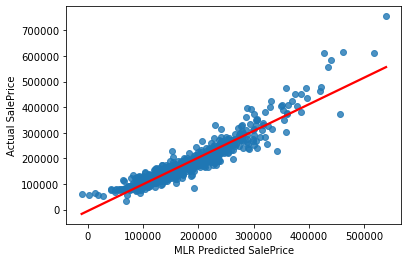

In [26]:
#MLR actual vs. predicted 
sns.regplot(y_predict, y_test, ci=None, line_kws={"color": "red"})
plt.xlabel('MLR Predicted SalePrice')
plt.ylabel('Actual SalePrice')

In [27]:
X = price_new.loc[:, ~price_new.columns.isin(['SalePrice'])]
y = price_new['SalePrice']

In [28]:
scaler = StandardScaler()
min_max = MinMaxScaler()

scaled = scaler.fit_transform(X)
X[:] = scaled

/var/folders/y5/b9fw24n10vgc4qtr2t4cyl3h0000gn/T/ipykernel_9678/3210239940.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[:] = scaled


In [29]:
imputer = KNNImputer(missing_values = np.nan, n_neighbors = 5, weights = 'uniform', metric = 'nan_euclidean')
imputer.fit(X)
X[:] = imputer.transform(X)

/var/folders/y5/b9fw24n10vgc4qtr2t4cyl3h0000gn/T/ipykernel_9678/385207001.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[:] = imputer.transform(X)
/var/folders/y5/b9fw24n10vgc4qtr2t4cyl3h0000gn/T/ipykernel_9678/385207001.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[:] = imputer.transform(X)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
# Ridge Without Hyperparameter Tuning
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge()
tt_ridge = TransformedTargetRegressor(regressor = Ridge(), func = np.log, inverse_func = np.exp)
tt_ridge.fit(X_train, y_train)

print('R^2 Train = %.3f' %(tt_ridge.score(X_train, y_train)))
print('R^2 Test = %.3f' %(tt_ridge.score(X_test, y_test)))

R^2 Train = 0.954
R^2 Test = 0.932


In [32]:
# Cross Validation for Ridge
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tt_ridge, X, y, cv = 5)
scores

array([0.93574468, 0.92644866, 0.94306559, 0.93534466, 0.93572945])

In [33]:
print('Mean Score = %.3f' %(scores.mean()))
print('Standard Deviation Score = %.3f' %(scores.std()))

Mean Score = 0.935
Standard Deviation Score = 0.005


In [34]:
# Grid Search for Ridge
from sklearn.model_selection import GridSearchCV

grid_para_ridge = [{
    'regressor__alpha': np.linspace(1e-3, 200, 20)
    }]

grid_search_ridge = GridSearchCV(tt_ridge, grid_para_ridge, scoring = 'r2', cv = 5, n_jobs = 1)
%time grid_search_ridge.fit(X_train, y_train)

CPU times: user 3.3 s, sys: 692 ms, total: 4 s
Wall time: 552 ms


GridSearchCV(cv=5,
             estimator=TransformedTargetRegressor(func=<ufunc 'log'>,
                                                  inverse_func=<ufunc 'exp'>,
                                                  regressor=Ridge()),
             n_jobs=1,
             param_grid=[{'regressor__alpha': array([1.00000000e-03, 1.05272632e+01, 2.10535263e+01, 3.15797895e+01,
       4.21060526e+01, 5.26323158e+01, 6.31585789e+01, 7.36848421e+01,
       8.42111053e+01, 9.47373684e+01, 1.05263632e+02, 1.15789895e+02,
       1.26316158e+02, 1.36842421e+02, 1.47368684e+02, 1.57894947e+02,
       1.68421211e+02, 1.78947474e+02, 1.89473737e+02, 2.00000000e+02])}],
             scoring='r2')

In [35]:
grid_search_ridge.best_params_

{'regressor__alpha': 168.4212105263158}

In [36]:
grid_search_ridge.best_score_

0.9323119230674927

In [37]:
print('R^2 Train = %.3f' %(grid_search_ridge.best_estimator_.score(X_train, y_train)))
print('R^2 Test = %.3f' %(grid_search_ridge.best_estimator_.score(X_test, y_test)))

#R^2 Train = 0.952
#R^2 Test = 0.932

R^2 Train = 0.952
R^2 Test = 0.932


/Users/stevenmlee/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


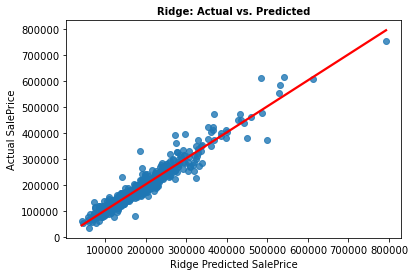

In [38]:
#Ridge actual vs. predicted 
tt_ridge.fit(X_train, y_train)
y_pred = tt_ridge.predict(X_test)

sns.regplot(y_pred, y_test, ci=None, line_kws={"color": "red"})
plt.xlabel('Ridge Predicted SalePrice')
plt.ylabel('Actual SalePrice')
plt.title(label="Ridge: Actual vs. Predicted",
          fontsize=10,
          color="black",fontweight="bold")
plt.show()

In [39]:
# Lasso Without Hyperparameter Tuning
lasso = Lasso()
tt_lasso = TransformedTargetRegressor(regressor = Lasso(), func = np.log, inverse_func = np.exp)
lasso.fit(X_train, y_train)

print('R^2 Train = %.3f' %(lasso.score(X_train, y_train)))
print('R^2 Test = %.3f' %(lasso.score(X_test, y_test)))

R^2 Train = 0.936
R^2 Test = 0.890


/Users/stevenmlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.137e+10, tolerance: 9.423e+08
  model = cd_fast.enet_coordinate_descent(


In [40]:
# Cross Validation for Lasso
scores = cross_val_score(lasso, X, y, cv = 5)
scores

/Users/stevenmlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.625e+10, tolerance: 1.086e+09
  model = cd_fast.enet_coordinate_descent(
/Users/stevenmlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.985e+10, tolerance: 1.093e+09
  model = cd_fast.enet_coordinate_descent(
/Users/stevenmlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

array([0.91098363, 0.90917175, 0.91381703, 0.91424193, 0.90168863])

In [41]:
print('Mean Score = %.3f' %(scores.mean()))
print('Standard Deviation Score = %.3f' %(scores.std()))

Mean Score = 0.910
Standard Deviation Score = 0.005


/Users/stevenmlee/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


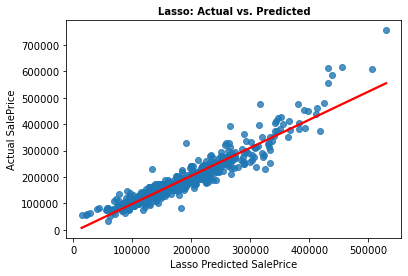

In [42]:
#Lasso actual vs. predicted
y_pred_lasso = lasso.predict(X_test)

sns.regplot(y_pred_lasso, y_test, ci=None, line_kws={"color": "red"})
plt.xlabel('Lasso Predicted SalePrice')
plt.ylabel('Actual SalePrice')
plt.title(label="Lasso: Actual vs. Predicted",
          fontsize=10,
          color="black",fontweight="bold")
plt.show()

In [43]:
# ElasticNet Without Hyperparameter Tuning
from sklearn.linear_model import ElasticNet

tt_elastic = TransformedTargetRegressor(regressor = ElasticNet(), func = np.log, inverse_func = np.exp)
elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)

print('R^2 Train = %.3f' %(elasticnet.score(X_train, y_train)))
print('R^2 Test = %.3f' %(elasticnet.score(X_test, y_test)))

R^2 Train = 0.917
R^2 Test = 0.865


In [44]:
# Cross Validation for ElasticNet
scores = cross_val_score(elasticnet, X, y, cv = 5)
scores

array([0.88959006, 0.88692043, 0.90330222, 0.91398549, 0.89935502])

In [45]:
print('Mean Score = %.3f' %(scores.mean()))
print('Standard Deviation Score = %.3f' %(scores.std()))

Mean Score = 0.899
Standard Deviation Score = 0.010


In [46]:
elasticnet = ElasticNet()

grid_para_elastic = [{
    'alpha': np.linspace(1e-3, 200, 20),
    'l1_ratio': np.linspace(0.1, 1, 10)
    }]

grid_search_elastic = GridSearchCV(elasticnet, grid_para_elastic, scoring = 'r2', cv = 5, n_jobs = 1)
%time grid_search_elastic.fit(X_train, y_train)

/Users/stevenmlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.521e+11, tolerance: 7.906e+08
  model = cd_fast.enet_coordinate_descent(
/Users/stevenmlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.285e+11, tolerance: 7.556e+08
  model = cd_fast.enet_coordinate_descent(
/Users/stevenmlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/stevenmlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.364e+11, tolerance: 7.345e+08
  model = cd_fast.enet_coordinate_descent(
/Users/stevenmlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.515e+11, tolerance: 7.906e+08
  model = cd_fast.enet_coordinate_descent(
/Users/stevenmlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/stevenmlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.028e+11, tolerance: 7.774e+08
  model = cd_fast.enet_coordinate_descent(
/Users/stevenmlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.231e+11, tolerance: 7.345e+08
  model = cd_fast.enet_coordinate_descent(
/Users/stevenmlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

CPU times: user 1min 16s, sys: 18.5 s, total: 1min 34s
Wall time: 13.2 s


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=1,
             param_grid=[{'alpha': array([1.00000000e-03, 1.05272632e+01, 2.10535263e+01, 3.15797895e+01,
       4.21060526e+01, 5.26323158e+01, 6.31585789e+01, 7.36848421e+01,
       8.42111053e+01, 9.47373684e+01, 1.05263632e+02, 1.15789895e+02,
       1.26316158e+02, 1.36842421e+02, 1.47368684e+02, 1.57894947e+02,
       1.68421211e+02, 1.78947474e+02, 1.89473737e+02, 2.00000000e+02]),
                          'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}],
             scoring='r2')

In [47]:
grid_search_elastic.best_params_

{'alpha': 200.0, 'l1_ratio': 1.0}

In [48]:
grid_search_elastic.best_score_

0.9095874038852185

In [49]:
print('R^2 Train = %.3f' %(grid_search_elastic.best_estimator_.score(X_train, y_train)))
print('R^2 Test = %.3f' %(grid_search_elastic.best_estimator_.score(X_test, y_test)))

#R^2 Train = 0.933
#R^2 Test = 0.891

R^2 Train = 0.933
R^2 Test = 0.891


/Users/stevenmlee/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


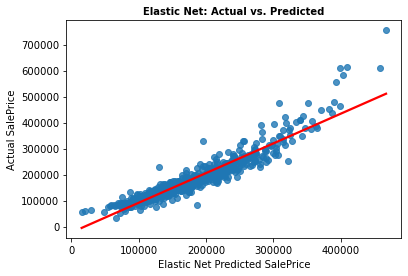

In [50]:
#Actual vs predicted for elastic net
elasticnet.fit(X_train, y_train)
y_pred_en = elasticnet.predict(X_test)

sns.regplot(y_pred_en, y_test, ci=None, line_kws={"color": "red"})
plt.xlabel('Elastic Net Predicted SalePrice')
plt.ylabel('Actual SalePrice')
plt.title(label="Elastic Net: Actual vs. Predicted",
          fontsize=10,
          color="black",fontweight="bold")
plt.show()

In [51]:
ridge.fit(X_train,y_train)
#create coeffient columns
coef_table = pd.DataFrame(list(X_train.columns)).copy()
#coef_table.insert(len(coef_table.columns),"MLR Coefs",lm.coef_.transpose())
coef_table.insert(len(coef_table.columns),"Ridge Coefs",ridge.coef_.transpose())
coef_table.insert(len(coef_table.columns),"Lasso Coefs",lasso.coef_.transpose())
coef_table.insert(len(coef_table.columns),"Elastic Net Coefs",elasticnet.coef_.transpose())
pd.set_option('display.float_format', lambda x: '%.3f' % x)
display(coef_table)

,0,Ridge Coefs,Lasso Coefs,Elastic Net Coefs
0,GrLivArea,15312.835,41003.751,7597.969
1,LotFrontage,-122.418,-127.584,2063.621
2,LotArea,6737.190,6737.537,3622.628
3,LotShape,776.251,775.975,-526.841
4,LandContour,-1866.875,-1862.018,-1710.301
...,...,...,...,...
186,GarageType__Basment,-266.228,-265.143,-556.901
187,GarageType__BuiltIn,89.858,72.764,1008.439
188,GarageType__CarPort,179.419,181.003,15.001
189,GarageType__Detchd,1103.945,1111.012,-575.165


In [52]:
#feature 10 ranking
coef_table.rename({0: 'Variables'}, axis=1, inplace=True)
#coef_table['MLR Ranking'] = coef_table['MLR Coefs'].rank(ascending=False)
coef_table['Ridge Ranking'] = coef_table['Ridge Coefs'].rank(ascending=False)
coef_table['Lasso Ranking'] = coef_table['Lasso Coefs'].rank(ascending=False)
coef_table['EN Ranking'] = coef_table['Elastic Net Coefs'].rank(ascending=False)

#coef_table['MLR T10'] = np.select([coef_table['MLR Ranking'] <= 10, coef_table['MLR Ranking'] > 10],
#                            [1,0])
coef_table['Ridge T10'] = np.select([coef_table['Ridge Ranking'] <= 10, coef_table['Ridge Ranking'] > 10],
                            [1,0])
coef_table['Lasso T10'] = np.select([coef_table['Lasso Ranking'] <= 10, coef_table['Lasso Ranking'] > 10],
                            [1,0])
coef_table['EN T10'] = np.select([coef_table['EN Ranking'] <= 10, coef_table['EN Ranking'] > 10],
                            [1,0])

coef_table['T10 Count'] = coef_table['Ridge T10'] + coef_table['Lasso T10'] + coef_table['EN T10'] #+ coef_table['MLR T10']

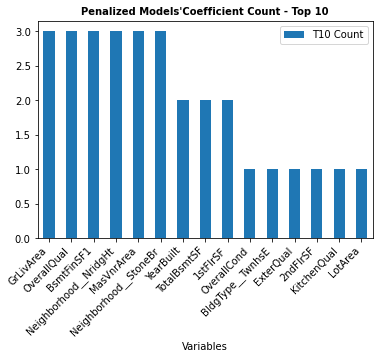

In [144]:
pd.set_option('display.max_rows', None)

t10 = coef_table.sort_values(by=['T10 Count'],ascending=False)
t10 = t10[t10['T10 Count'] > 0]
#t4 = t10[t10['T10 Count'] < 2.5]
ax = t10.plot(x="Variables", y= ['T10 Count'], kind="bar")

#t10.plot(x="Variables", y= ['T10 Count'], kind="bar")
plt.xticks(rotation=45, ha='right')
plt.title(label="Penalized Models'Coefficient Count - Top 10",
          fontsize=10,
          color="black",fontweight="bold")

#plt.bar(x = , y[t6], color = 'green')
#plt.bar(x[t4], y[t4], color = 'blue')
#barlist=plt.bar([1,2,3,4,5,6,7,8,9,10,11,12,13,14], [1,2,3,4,5,6,7,8,9,10,11,12,13,14])
#t10[1].set_color('r')
#colors=['#DF4601','#DF4601','#DF4601','#DF4601','#DF4601','#DF4601']
#ax=t10.plot(kind='bar')
#for patch,color in zip(ax.patches,colors):
    #patch.set_facecolor(color)
plt.show()


In [113]:
type(t10)

pandas.core.frame.DataFrame

In [54]:
coef_table

,Variables,Ridge Coefs,Lasso Coefs,Elastic Net Coefs,Ridge Ranking,Lasso Ranking,EN Ranking,Ridge T10,Lasso T10,EN T10,T10 Count
0,GrLivArea,15312.835,41003.751,7597.969,1.000,1.000,1.000,1,1,1,3
1,LotFrontage,-122.418,-127.584,2063.621,122.000,120.000,27.000,0,0,0,0
2,LotArea,6737.190,6737.537,3622.628,11.000,9.000,12.000,0,1,0,1
3,LotShape,776.251,775.975,-526.841,67.000,67.000,154.000,0,0,0,0
4,LandContour,-1866.875,-1862.018,-1710.301,172.000,168.000,190.000,0,0,0,0
5,Utilities,973.090,970.990,700.699,57.000,58.000,54.000,0,0,0,0
6,LandSlope,-1989.869,-1984.561,-477.263,174.000,170.000,149.000,0,0,0,0
7,OverallQual,10774.068,10778.493,7521.695,3.000,3.000,2.000,1,1,1,3
8,OverallCond,6253.182,6271.666,2470.884,13.000,10.000,22.000,0,1,0,1
9,YearBuilt,13498.874,13599.369,2525.133,2.000,2.000,21.000,1,1,0,2


In [55]:
allv = coef_table.sort_values(by=['T10 Count'],ascending=False)
limit = 2500
#allv = t10[t10['MLR Coefs'] > limit) | (t10[t10['MLR Coefs'] < -limit])
#allv[(allv['MLR Coefs'] > limit) | (allv['MLR Coefs'] < -1000 )]
#allv = allv[(allv['MLR Coefs'] > limit) | (allv['MLR Coefs'] < -limit )]
allv = allv[(allv['Ridge Coefs'] > limit) | (allv['Ridge Coefs'] < -limit )]
allv = allv[(allv['Lasso Coefs'] > limit) | (allv['Lasso Coefs'] < -limit )]
allv = allv[(allv['Elastic Net Coefs'] > limit) | (allv['Elastic Net Coefs'] < -limit )]

In [79]:
allv

,Variables,Ridge Coefs,Lasso Coefs,Elastic Net Coefs,Ridge Ranking,Lasso Ranking,EN Ranking,Ridge T10,Lasso T10,EN T10,T10 Count
0,GrLivArea,15312.835,41003.751,7597.969,1.000,1.000,1.000,1,1,1,3
7,OverallQual,10774.068,10778.493,7521.695,3.000,3.000,2.000,1,1,1,3
18,BsmtFinSF1,6860.805,10438.419,4834.961,9.000,4.000,5.000,1,1,1,3
93,Neighborhood__NridgHt,7341.665,7353.101,4443.935,7.000,6.000,10.000,1,1,1,3
11,MasVnrArea,6875.498,6870.581,4831.227,8.000,8.000,6.000,1,1,1,3
99,Neighborhood__StoneBr,7396.934,7431.293,4739.811,6.000,5.000,7.000,1,1,1,3
9,YearBuilt,13498.874,13599.369,2525.133,2.000,2.000,21.000,1,1,0,2
22,TotalBsmtSF,6815.178,3337.575,5451.150,10.000,21.000,4.000,1,0,1,2
24,1stFlrSF,8000.981,-11735.346,6355.676,5.000,188.000,3.000,1,0,1,2
12,ExterQual,3930.011,3931.131,4664.617,18.000,15.000,8.000,0,0,1,1


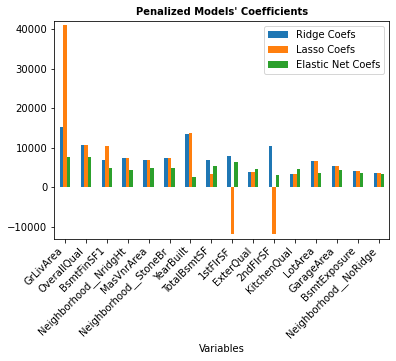

In [88]:
#plot important coefficients 


allv.plot(x="Variables", y=["Ridge Coefs", "Lasso Coefs", "Elastic Net Coefs"], kind="bar")
plt.ylim((-13000,42000))
plt.xticks(rotation=45, ha='right')
plt.title(label="Penalized Models' Coefficients",
          fontsize=10,
          color="black",fontweight="bold")
plt.show()

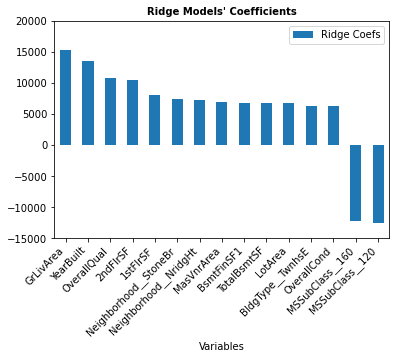

In [152]:
limit = 6000
allv_ridge = coef_table.sort_values(by=['Ridge Coefs'],ascending=False)
#allv_ridge['Ridge Coefs'] = allv_ridge['Ridge Coefs'].rank(ascending=False)
allv_ridge= allv_ridge[(allv_ridge['Ridge Coefs'] > limit) | (allv_ridge['Ridge Coefs'] < -limit )]
allv_ridge.plot(x="Variables", y=["Ridge Coefs"], kind="bar")

plt.ylim((-15000,20000))
plt.xticks(rotation=45, ha='right')
plt.title(label="Ridge Models' Coefficients",
          fontsize=10,
          color="black",fontweight="bold")
plt.show()

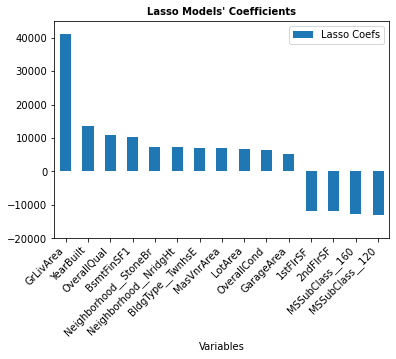

In [155]:
limit = 5000
allv_lasso = coef_table.sort_values(by=['Lasso Coefs'],ascending=False)
allv_lasso= allv_lasso[(allv_lasso['Lasso Coefs'] > limit) | (allv_lasso['Lasso Coefs'] < -limit )]
allv_lasso.plot(x="Variables", y=["Lasso Coefs"], kind="bar")

plt.ylim((-20000,45000))
plt.xticks(rotation=45, ha='right')
plt.title(label="Lasso Models' Coefficients",
          fontsize=10,
          color="black",fontweight="bold")
plt.show()

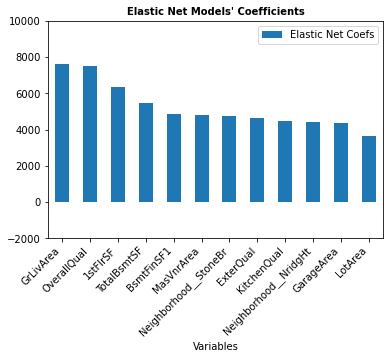

In [157]:
limit = 3500
allv_en = coef_table.sort_values(by=['Elastic Net Coefs'],ascending=False)
allv_en= allv_en[(allv_en['Elastic Net Coefs'] > limit) | (allv_en['Elastic Net Coefs'] < -limit )]
allv_en.plot(x="Variables", y=["Elastic Net Coefs"], kind="bar")

plt.ylim((-2000,10000))
plt.xticks(rotation=45, ha='right')
plt.title(label="Elastic Net Models' Coefficients",
          fontsize=10,
          color="black",fontweight="bold")
plt.show()

In [57]:
# Random Forest Without hyperparameter tuning
from sklearn import ensemble

forest = ensemble.RandomForestRegressor()
tt_forest = TransformedTargetRegressor(regressor = ensemble.RandomForestRegressor(), func = np.log, inverse_func = np.exp)

tt_forest.set_params()
tt_forest.fit(X_train, y_train)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=RandomForestRegressor())

In [58]:
print('R^2 Train = %.3f' %(tt_forest.score(X_train, y_train)))
print('R^2 Test = %.3f' %(tt_forest.score(X_test, y_test)))

R^2 Train = 0.984
R^2 Test = 0.880


In [59]:
# Cross Validation for Random Forest
scores = cross_val_score(tt_forest, X, y, cv = 5)
scores

array([0.87999911, 0.89675638, 0.89938183, 0.91478068, 0.90068793])

In [60]:
print('Mean Score = %.3f' %(scores.mean()))
print('Standard Deviation Score = %.3f' %(scores.std()))

Mean Score = 0.898
Standard Deviation Score = 0.011


In [61]:
# WARNING! CELL TAKES FOREVER TO RUN!

#from sklearn.model_selection import GridSearchCV
#from sklearn import ensemble

#forest = ensemble.RandomForestRegressor()

#grid_para_forest = [{
#    'n_estimators': range(10, 110, 10),
#    'criterion': ['squared_error'],
#    'max_depth': range(1, 31),
#    }]

#grid_search_forest = GridSearchCV(forest, grid_para_forest, scoring = 'r2', cv = 5, n_jobs = 1)
#%time grid_search_forest.fit(X_train, y_train)

In [62]:
#grid_search_forest.best_params_

In [63]:
#grid_search_forest.best_score_

In [64]:
#print('R^2 Train = %.3f' %(grid_search_forest.best_estimator_.score(X_train, y_train)))
#print('R^2 Test = %.3f' %(grid_search_forest.best_estimator_.score(X_test, y_test)))

#R^2 Train = 0.976
#R^2 Test = 0.845

In [65]:
# Gradient Boost Without hyperparameter tuning
from sklearn.ensemble import GradientBoostingRegressor

tt_gbm = TransformedTargetRegressor(regressor = ensemble.GradientBoostingRegressor(), func = np.log, inverse_func = np.exp)
gbm = ensemble.GradientBoostingRegressor()
tt_gbm.fit(X_train, y_train)

print('R^2 Train = %.3f' %(tt_gbm.score(X_train, y_train)))
print('R^2 Test = %.3f' %(tt_gbm.score(X_test, y_test)))

R^2 Train = 0.964
R^2 Test = 0.911


In [66]:
# Cross Validation for Gradient Boost
scores = cross_val_score(tt_gbm, X, y, cv = 5)
scores

array([0.92063097, 0.92917954, 0.9292722 , 0.93564933, 0.93495193])

In [67]:
print('Mean Score = %.3f' %(scores.mean()))
print('Standard Deviation Score = %.3f' %(scores.std()))

Mean Score = 0.930
Standard Deviation Score = 0.005


In [68]:
# WARNING! CELL TAKES FOREVER TO RUN!

#from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import GradientBoostingRegressor

#gbm = ensemble.GradientBoostingRegressor()

#grid_para_gbm = [{
#    'regressor__min_samples_split': range(10, 101, 10),
#    'regressor__learning_rate': [0.05],
#    'regressor__n_estimators': range(1, 5001, 500),
#    'regressor__criterion': ['squared_error'],
#    'regressor__max_features': [7]
#    }]

#grid_search_gbm = GridSearchCV(tt_gbm, grid_para_gbm, scoring = 'r2', cv = 5, n_jobs = 1)
#%time grid_search_gbm.fit(X_train, y_train)

In [69]:
#grid_search_gbm.best_params_

In [70]:
#{'regressor__criterion': 'squared_error',
# 'regressor__learning_rate': 0.05,
# 'regressor__max_features': 7,
# 'regressor__min_samples_split': 10,
# 'regressor__n_estimators': 3001}

In [71]:
#grid_search_gbm.best_score_

In [72]:
#print('R^2 Train = %.3f' %(grid_search_gbm.best_estimator_.score(X_train, y_train)))
#print('R^2 Test = %.3f' %(grid_search_gbm.best_estimator_.score(X_test, y_test)))

#R^2 Train = 0.993
#R^2 Test = 0.931

In [73]:
#X_cols = list(X.columns)
#imp_dict = {}

#for i, f in zip(X_cols, grid_search_gbm.best_estimator_.regressor_.feature_importances_):
#  imp_dict[i] = round(f * 100, 2)

#imp_dict_sorted = {k: v for k, v in sorted(imp_dict.items(), key = lambda item: item[1], reverse = True)}
#imp_dict_sorted

In [74]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

1795
770
1795
770


Scores on different algorithms before changes:

**Test Scores:**

MLR: 0.815

Ridge: 0.815

Lasso: 0.817

ElasticNet: 0.795

Random Forest: 0.846

Gradient Boost: 0.880

______________________


**Cross Validation:**

MLR: 
Mean Score = -73827866173983636324352.000,
Standard Deviation Score = 147254384599818240524288.000

Ridge:
Mean Score = 0.817,
Standard Deviation Score = 0.010

Lasso:
Mean Score = 0.817,
Standard Deviation Score = 0.011

ElasticNet:
Mean Score = 0.807,
Standard Deviation Score = 0.013

Random Forest:
Mean Score = 0.847,
Standard Deviation Score = 0.027

Gradient Boost:
Mean Score = 0.860,
Standard Deviation Score = 0.034

Scores on different algorithms after changes:

**Test Scores:**

MLR: 0.882

Ridge: 0.875 

Lasso: 0.883

ElasticNet: 0.848

Random Forest: 0.895

Gradient Boost: 0.918

______________________

**Cross Validation:**

MLR:
Mean Score = -889003624915093052981248.000,
Standard Deviation Score = 1741610393199159929733120.000

Ridge:
Mean Score = 0.873,
Standard Deviation Score = 0.020

Lasso:
Mean Score = 0.875,
Standard Deviation Score = 0.022

ElasticNet:
Mean Score = 0.857,
Standard Deviation Score = 0.020

Random Forest:
Mean Score = 0.890,
Standard Deviation Score = 0.031

Gradient Boost:
Mean Score = 0.895,
Standard Deviation Score = 0.040


Scores on different algorithms without removing multicollinearity:

**Test Scores:**

Ridge: 0.896

Lasso: 0.901

ElasticNet: 0.878

Random Forest: 0.900

Gradient Boost: 0.919

______________________

**Cross Validation:**

Ridge:
Mean Score = 0.900,
Standard Deviation Score = 0.018

Lasso:
Mean Score = 0.903,
Standard Deviation Score = 0.019

ElasticNet:
Mean Score = 0.891,
Standard Deviation Score = 0.019

Random Forest:
Mean Score = 0.896
Standard Deviation Score = 0.028

Gradient Boost:
Mean Score = 0.906
Standard Deviation Score = 0.032


Scores I got with/without log transformations:

**Test Scores:**

Ridge: 0.932 (log transformation)

Lasso: 0.891

ElasticNet: 0.865

Random Forest: 0.877 (log transformation)

Gradient Boost: 0.911 (log transformation)

______________________

**Cross Validation:**

Ridge (log transformation):
Mean Score = 0.935,
Standard Deviation Score = 0.005

Lasso:
Mean Score = 0.899,
Standard Deviation Score = 0.010

ElasticNet:
Mean Score = 0.899,
Standard Deviation Score = 0.010

Random Forest (log transformation):
Mean Score = 0.900,
Standard Deviation Score = 0.009

Gradient Boost (log transformation):
Mean Score = 0.930,
Standard Deviation Score = 0.006

Hyperparameter Tuning of Log Transformed Ridge and Gradient Boost:

**Test Scores:**

Ridge: 0.932

Gradient Boost: 0.931

In [ ]:
#{'regressor__criterion': 'squared_error',
# 'regressor__learning_rate': 0.05,
# 'regressor__max_features': 7,
# 'regressor__min_samples_split': 10,
# 'regressor__n_estimators': 3001}

tuned_gbm = tt_gbm
tuned_gbm.set_params(regressor__criterion = 'squared_error', regressor__learning_rate = 0.05, regressor__max_features = 7, regressor__min_samples_split = 10, 
                     regressor__n_estimators = 3001)

tuned_gbm.fit(X_train, y_train)

In [75]:
gbm_predictions = tuned_gbm.predict(X_test)

In [76]:
ridge_predictions = grid_search_ridge.predict(X_test)

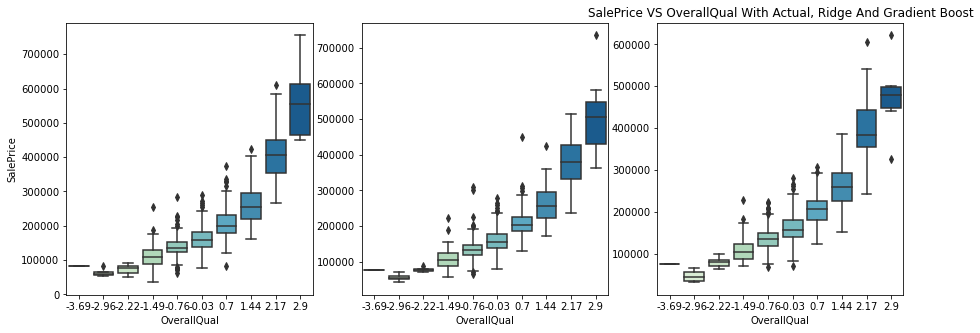

In [77]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
plt.title('SalePrice VS OverallQual With Actual, Ridge And Gradient Boost')
sns.boxplot(ax = axes[0], x = round(X_test['OverallQual'], 2), y = y_test, palette='GnBu')
sns.boxplot(ax = axes[1], x = round(X_test['OverallQual'], 2), y = ridge_predictions, palette='GnBu')
sns.boxplot(ax = axes[2], x = round(X_test['OverallQual'], 2), y = gbm_predictions, palette='GnBu')
plt.show()

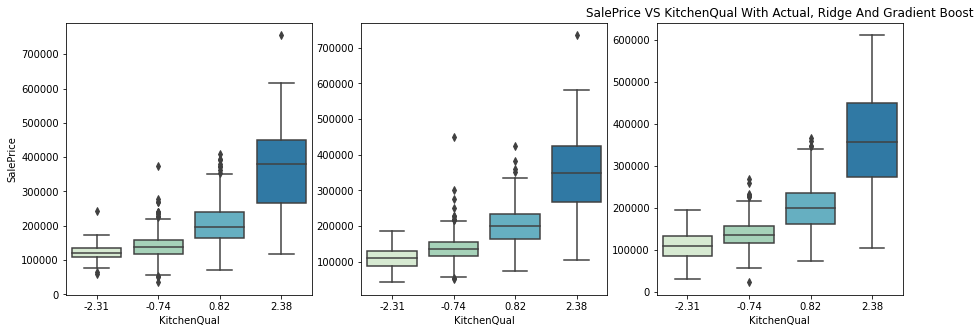

In [78]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
plt.title('SalePrice VS KitchenQual With Actual, Ridge And Gradient Boost')
sns.boxplot(ax = axes[0], x = round(X_test['KitchenQual'], 2), y = y_test, palette='GnBu')
sns.boxplot(ax = axes[1], x = round(X_test['KitchenQual'], 2), y = ridge_predictions, palette='GnBu')
sns.boxplot(ax = axes[2], x = round(X_test['KitchenQual'], 2), y = gbm_predictions, palette='GnBu')
plt.show()

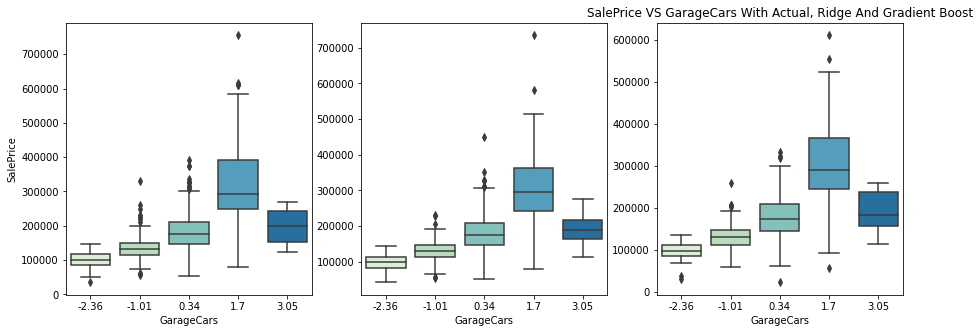

In [79]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
plt.title('SalePrice VS GarageCars With Actual, Ridge And Gradient Boost')
sns.boxplot(ax = axes[0], x = round(X_test['GarageCars'], 2), y = y_test, palette='GnBu')
sns.boxplot(ax = axes[1], x = round(X_test['GarageCars'], 2), y = ridge_predictions, palette='GnBu')
sns.boxplot(ax = axes[2], x = round(X_test['GarageCars'], 2), y = gbm_predictions, palette='GnBu')
plt.show()

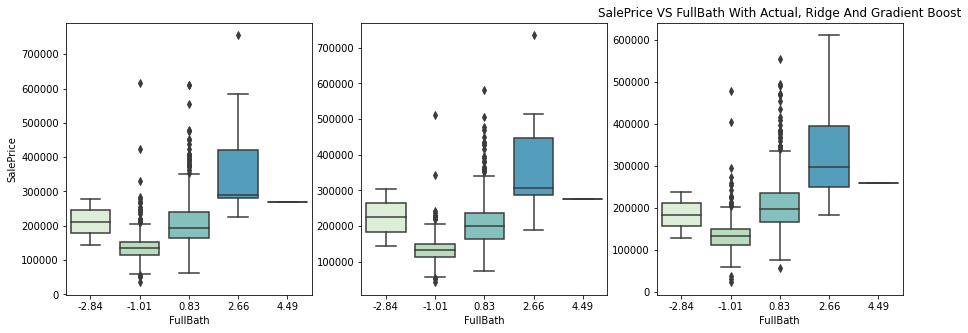

In [80]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
plt.title('SalePrice VS FullBath With Actual, Ridge And Gradient Boost')
sns.boxplot(ax = axes[0], x = round(X_test['FullBath'], 2), y = y_test, palette='GnBu')
sns.boxplot(ax = axes[1], x = round(X_test['FullBath'], 2), y = ridge_predictions, palette='GnBu')
sns.boxplot(ax = axes[2], x = round(X_test['FullBath'], 2), y = gbm_predictions, palette='GnBu')
plt.show()

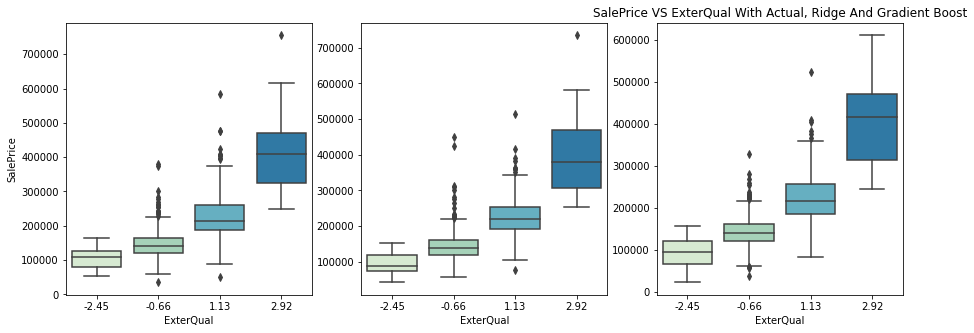

In [81]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
plt.title('SalePrice VS ExterQual With Actual, Ridge And Gradient Boost')
sns.boxplot(ax = axes[0], x = round(X_test['ExterQual'], 2), y = y_test, palette='GnBu')
sns.boxplot(ax = axes[1], x = round(X_test['ExterQual'], 2), y = ridge_predictions, palette='GnBu')
sns.boxplot(ax = axes[2], x = round(X_test['ExterQual'], 2), y = gbm_predictions, palette='GnBu')
plt.show()

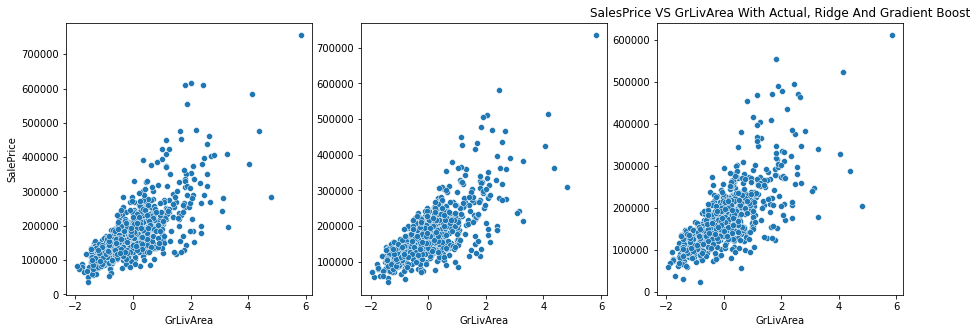

In [82]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
plt.title('SalesPrice VS GrLivArea With Actual, Ridge And Gradient Boost')
sns.scatterplot(ax = axes[0], x = X_test['GrLivArea'], y = y_test)
sns.scatterplot(ax = axes[1], x = X_test['GrLivArea'], y = ridge_predictions)
sns.scatterplot(ax = axes[2], x = X_test['GrLivArea'], y = gbm_predictions)
plt.show()

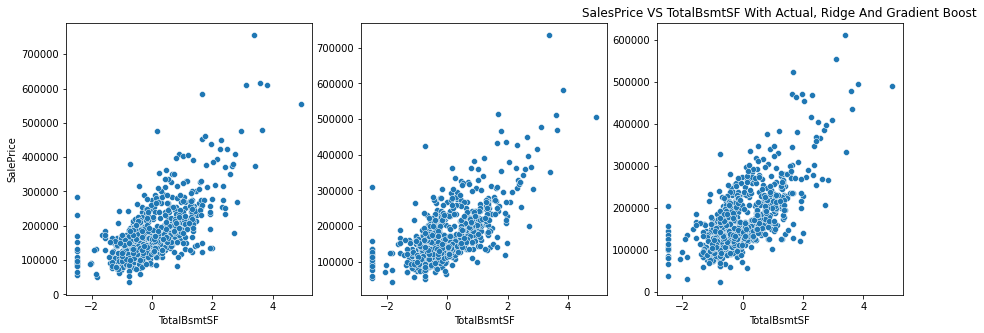

In [83]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
plt.title('SalesPrice VS TotalBsmtSF With Actual, Ridge And Gradient Boost')
sns.scatterplot(ax = axes[0], x = X_test['TotalBsmtSF'], y = y_test)
sns.scatterplot(ax = axes[1], x = X_test['TotalBsmtSF'], y = ridge_predictions)
sns.scatterplot(ax = axes[2], x = X_test['TotalBsmtSF'], y = gbm_predictions)
plt.show()

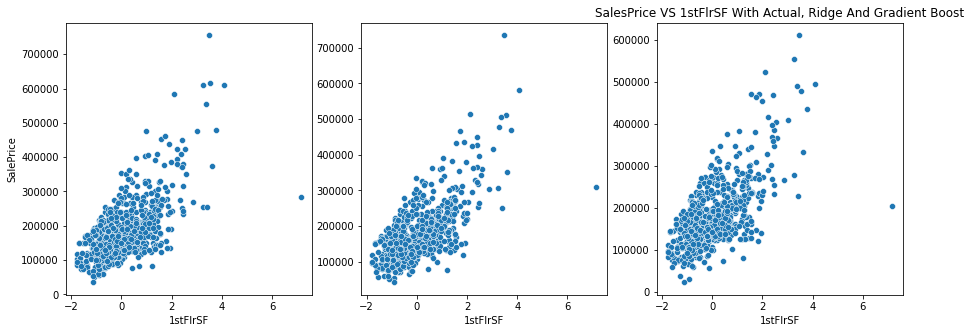

In [84]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
plt.title('SalesPrice VS 1stFlrSF With Actual, Ridge And Gradient Boost')
sns.scatterplot(ax = axes[0], x = X_test['1stFlrSF'], y = y_test)
sns.scatterplot(ax = axes[1], x = X_test['1stFlrSF'], y = ridge_predictions)
sns.scatterplot(ax = axes[2], x = X_test['1stFlrSF'], y = gbm_predictions)
plt.show()

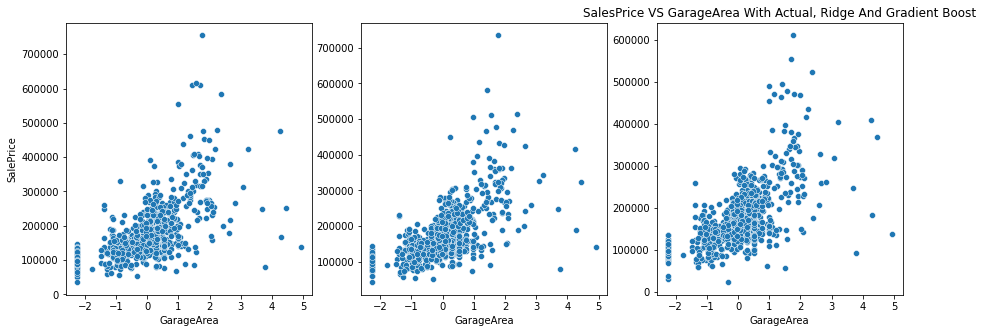

In [85]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
plt.title('SalesPrice VS GarageArea With Actual, Ridge And Gradient Boost')
sns.scatterplot(ax = axes[0], x = X_test['GarageArea'], y = y_test)
sns.scatterplot(ax = axes[1], x = X_test['GarageArea'], y = ridge_predictions)
sns.scatterplot(ax = axes[2], x = X_test['GarageArea'], y = gbm_predictions)
plt.show()

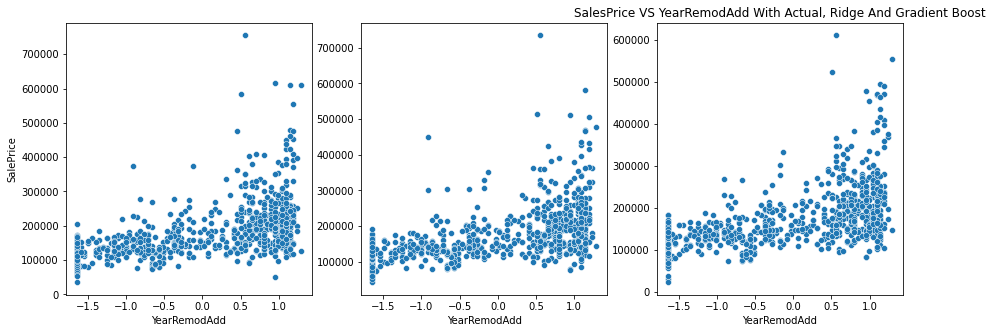

In [86]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
plt.title('SalesPrice VS YearRemodAdd With Actual, Ridge And Gradient Boost')
sns.scatterplot(ax = axes[0], x = X_test['YearRemodAdd'], y = y_test)
sns.scatterplot(ax = axes[1], x = X_test['YearRemodAdd'], y = ridge_predictions)
sns.scatterplot(ax = axes[2], x = X_test['YearRemodAdd'], y = gbm_predictions)
plt.show()

**Gradient Boost Feature Importance Top 10:**

'OverallQual': 8.36,
 
 'GarageArea': 6.0,

 'KitchenQual': 5.79,
 
 'TotalBsmtSF': 5.2,
 
 'GarageCars': 4.99,
 
 'GrLivArea': 4.78,
 
 '1stFlrSF': 4.36,
 
 'YearRemodAdd': 4.11,
 
 'FullBath': 4.07,
 
 'ExterQual': 3.97
 
 **Note: This is from an earlier iteration so the below visualization will differ from the numbers I recorded in this cell.**

In [87]:
X_cols = list(X.columns)
imp_dict = {}

for i, f in zip(X_cols, tuned_gbm.regressor_.feature_importances_):
  imp_dict[i] = round(f * 100, 2)

imp_dict_sorted = {k: v for k, v in sorted(imp_dict.items(), key = lambda item: item[1], reverse = True)}

In [88]:
import itertools

imp_dict_top_10 = dict(itertools.islice(imp_dict_sorted.items(), 10))
imp_dict_top_10

{'GarageFinish': 7.3,
 'GarageArea': 6.2,
 'GrLivArea': 5.91,
 'OverallQual': 4.95,
 '1stFlrSF': 4.66,
 'TotalBsmtSF': 4.32,
 'KitchenQual': 3.86,
 'TotRmsAbvGrd': 3.57,
 'ExterQual': 3.54,
 'BsmtFinType1': 3.4}

<BarContainer object of 10 artists>

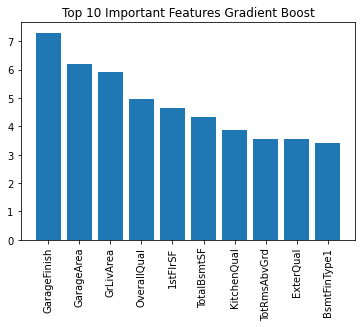

In [89]:
plt.title('Top 10 Important Features Gradient Boost')
plt.xticks(rotation = 90)
plt.bar(imp_dict_top_10.keys(), imp_dict_top_10.values())

In [90]:
tt_gbm = TransformedTargetRegressor(regressor = ensemble.GradientBoostingRegressor(), func = np.log, inverse_func = np.exp)
tt_gbm.fit(X_train, y_train)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=GradientBoostingRegressor())

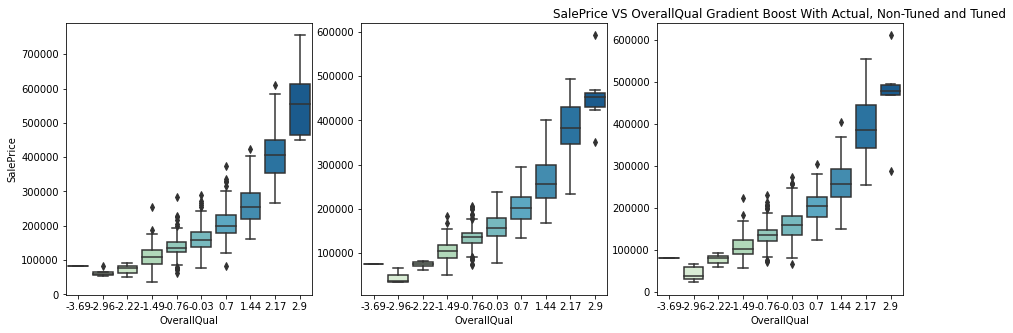

In [91]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
plt.title('SalePrice VS OverallQual Gradient Boost With Actual, Non-Tuned and Tuned')
sns.boxplot(ax = axes[0], x = round(X_test['OverallQual'], 2), y = y_test, palette='GnBu')
sns.boxplot(ax = axes[1], x = round(X_test['OverallQual'], 2), y = tt_gbm.predict(X_test), palette='GnBu')
sns.boxplot(ax = axes[2], x = round(X_test['OverallQual'], 2), y = gbm_predictions, palette='GnBu')
plt.show()

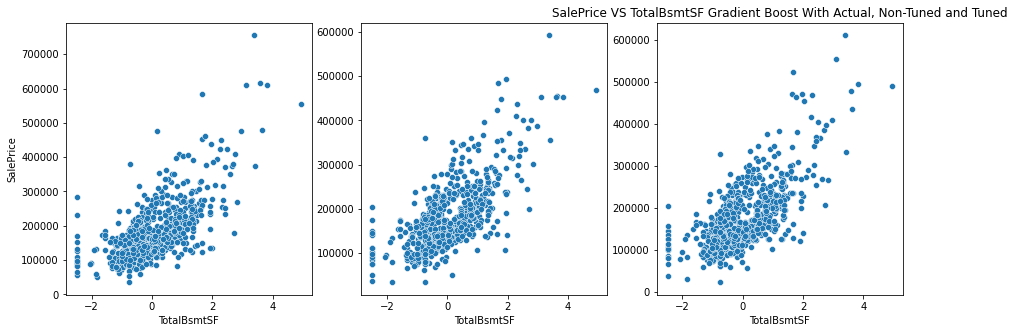

In [92]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
plt.title('SalePrice VS TotalBsmtSF Gradient Boost With Actual, Non-Tuned and Tuned')
sns.scatterplot(ax = axes[0], x = X_test['TotalBsmtSF'], y = y_test)
sns.scatterplot(ax = axes[1], x = X_test['TotalBsmtSF'], y = tt_gbm.predict(X_test))
sns.scatterplot(ax = axes[2], x = X_test['TotalBsmtSF'], y = gbm_predictions)
plt.show()

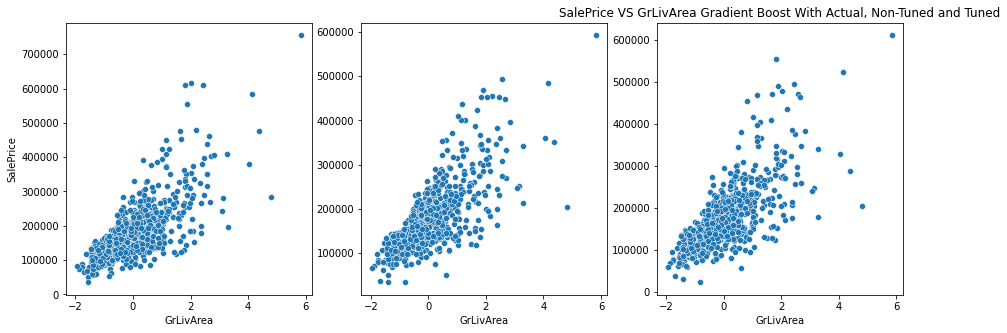

In [93]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
plt.title('SalePrice VS GrLivArea Gradient Boost With Actual, Non-Tuned and Tuned')
sns.scatterplot(ax = axes[0], x = X_test['GrLivArea'], y = y_test)
sns.scatterplot(ax = axes[1], x = X_test['GrLivArea'], y = tt_gbm.predict(X_test))
sns.scatterplot(ax = axes[2], x = X_test['GrLivArea'], y = gbm_predictions)
plt.show()

In [94]:
len(X.columns)

191